<a href="https://colab.research.google.com/github/MarioTiara/COVID-19/blob/master/MODEL_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MarioTiara/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 276 (delta 2), reused 0 (delta 0), pack-reused 265
Receiving objects: 100% (276/276), 106.25 MiB | 13.10 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Checking out files: 100% (649/649), done.


In [0]:
import os
os.chdir('/content/COVID-19/DATA_X_RAY/')

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
IMG_DIM = (299, 299)
train_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/TRAIN/*')
train_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in train_files]

validation_files = glob.glob('/content/COVID-19/DATA_X_RAY/DATA FULL/VAL2/*')
validation_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[1].strip() for fn in validation_files]

In [5]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (142, 299, 299, 3) 	Validation dataset shape: (40, 299, 299, 3)


In [6]:
print (train_labels)

['NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-

In [7]:
print (validation_labels)

['NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL']


(299, 299, 3)


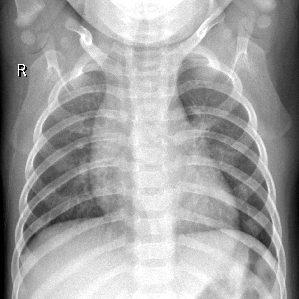

In [8]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
tf.keras.preprocessing.image.array_to_img(train_imgs[0])

In [9]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[70:80], train_labels_enc[70:80])

['NORMAL', 'NORMAL', 'NORMAL', 'COVID-19', 'NORMAL', 'COVID-19', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL'] [1 1 1 0 1 0 1 1 1 1]


In [10]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=IMG_DIM+(3,))


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
NUM_CLASSES = 1

vgg16 =tf.keras.models.Sequential()
vgg16.add(vgg)
vgg16.add(tf.keras.layers.Dropout(0.3))
vgg16.add(tf.keras.layers.Flatten())
vgg16.add(tf.keras.layers.Dropout(0.5))
vgg16.add(tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid'))

In [0]:
vgg16.layers[0].trainable = False

vgg16.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy'])

In [0]:
vgg16.compile(loss='binary_crossentropy', optimizer=
              tf.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, 
                                    beta_2=0.999, epsilon=None, decay=0.0,
                                    amsgrad=False), metrics=["accuracy"])

In [14]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 41473     
Total params: 14,756,161
Trainable params: 41,473
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
train_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [0]:
history = vgg16.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)  

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 101s 1s/step - loss: 0.3772 - accuracy: 0.8303 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 2/100
100/100 [==============================] - 95s 949ms/step - loss: 0.1545 - accuracy: 0.9553 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 3/100
100/100 [==============================] - 96s 962ms/step - loss: 0.1090 - accuracy: 0.9739 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 4/100
100/100 [==============================] - 96s 957ms/step - loss: 0.0805 - accuracy: 0.9817 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 5/100
100/100 [==============================] - 94s 944ms/step - loss: 0.0670 - accuracy: 0.9842 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 6/100
100/100 [==============================] - 93s 932ms/step - loss: 0.0591 - accuracy: 0.9859 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 7/100
100/100 [=============================